In [2]:
from gensim.models.keyedvectors import KeyedVectors
import numpy as np
import nltk
from sklearn.decomposition import PCA
import pylab as plt
from matplotlib.collections import LineCollection

from nltk.corpus import words
import pandas as pd
import sys
from scipy import spatial
from collections import Counter
import networkx as nx
from collections import defaultdict

import re
import gensim
from gensim.models.poincare import PoincareModel, PoincareRelations
#from gensim.viz.poincare import poincare_2d_visualization

# flush print
def flushPrint(d):
    sys.stdout.write('\r')
    sys.stdout.write(str(d))
    sys.stdout.flush()

In [6]:
edges=list(T.edges())
len(edges)

13808

In [3]:
import pandas as pd
df = pd.read_csv('BG_Co.txt', sep='\t', names = ['s1', 's2', 'w'])
df.head()

,s1,s2,w
0,customer service,sales,13696300
1,management,sales,12319583
2,communication skills,management,11803370
3,management,customer service,11489953
4,leadership,management,10558244


In [4]:
len(df)

8080559

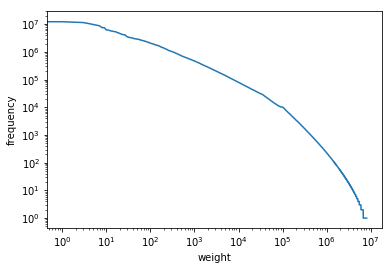

In [35]:
plt.plot(df['w'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('weight')
plt.ylabel('frequency');

In [60]:
dat = df[df['w'] >= np.mean(df['w'])]
len(dat)

508166

In [6]:
edges = list(df.itertuples(index=False, name=None)) # convert dataframe to list of tuples

In [7]:
g=nx.Graph()
g.add_weighted_edges_from(edges)
nx.info(g)

'Name: \nType: Graph\nNumber of nodes: 11480\nNumber of edges: 8080559\nAverage degree: 1407.7629'

## maximum spanning tree

In [8]:
M=nx.maximum_spanning_tree(g, algorithm='kruskal', weight='weight')
nx.info(M)

'Name: \nType: Graph\nNumber of nodes: 11480\nNumber of edges: 11479\nAverage degree:   1.9998'

In [9]:
edges=list(M.edges())
len(edges)

11479

In [ ]:
import os,logging
logging.basicConfig(level=logging.INFO)
model = PoincareModel(edges, negative=10, size=2)

import time
start=time.time()
model.train(epochs=1000)
print(time.time()-start)

model.save('burning_glass.maximum1000.poincare')

INFO:gensim.models.poincare:Loading relations from train data..
INFO:gensim.models.poincare:Loaded 11479 relations from train data, 11480 nodes
INFO:gensim.models.poincare:training model of size 2 with 1 workers on 11479 relations for 1000 epochs and 10 burn-in epochs, using lr=0.10000 burn-in lr=0.01000 negative=10
INFO:gensim.models.poincare:Starting burn-in (10 epochs)----------------------------------------
INFO:gensim.models.poincare:Training on epoch 1, examples #9990-#10000, loss: 23.66
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.97 s, 1676.45 examples / s
INFO:gensim.models.poincare:Training on epoch 2, examples #9990-#10000, loss: 23.32
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.88 s, 1701.27 examples / s
INFO:gensim.models.poincare:Training on epoch 3, examples #9990-#10000, loss: 23.11
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.83 s, 1714.39 examples / s
INFO:gensim.models.poincare:Training on epoch 4, examples #9990-#1000

INFO:gensim.models.poincare:Time taken for 10000 examples: 5.84 s, 1711.45 examples / s
INFO:gensim.models.poincare:Training on epoch 36, examples #9990-#10000, loss: 9.05
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.83 s, 1714.08 examples / s
INFO:gensim.models.poincare:Training on epoch 37, examples #9990-#10000, loss: 8.93
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.79 s, 1727.12 examples / s
INFO:gensim.models.poincare:Training on epoch 38, examples #9990-#10000, loss: 8.77
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.85 s, 1710.86 examples / s
INFO:gensim.models.poincare:Training on epoch 39, examples #9990-#10000, loss: 8.73
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.85 s, 1709.11 examples / s
INFO:gensim.models.poincare:Training on epoch 40, examples #9990-#10000, loss: 8.60
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.80 s, 1723.26 examples / s
INFO:gensim.models.poincare:Training on epoch 41, ex

INFO:gensim.models.poincare:Time taken for 10000 examples: 5.91 s, 1691.76 examples / s
INFO:gensim.models.poincare:Training on epoch 84, examples #9990-#10000, loss: 6.30
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.81 s, 1720.58 examples / s
INFO:gensim.models.poincare:Training on epoch 85, examples #9990-#10000, loss: 6.28
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.84 s, 1712.05 examples / s
INFO:gensim.models.poincare:Training on epoch 86, examples #9990-#10000, loss: 6.19
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.82 s, 1717.04 examples / s
INFO:gensim.models.poincare:Training on epoch 87, examples #9990-#10000, loss: 6.20
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.81 s, 1720.88 examples / s
INFO:gensim.models.poincare:Training on epoch 88, examples #9990-#10000, loss: 6.20
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.89 s, 1697.23 examples / s
INFO:gensim.models.poincare:Training on epoch 89, ex

INFO:gensim.models.poincare:Training on epoch 131, examples #9990-#10000, loss: 5.48
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.80 s, 1724.72 examples / s
INFO:gensim.models.poincare:Training on epoch 132, examples #9990-#10000, loss: 5.43
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.80 s, 1725.63 examples / s
INFO:gensim.models.poincare:Training on epoch 133, examples #9990-#10000, loss: 5.41
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.78 s, 1729.51 examples / s
INFO:gensim.models.poincare:Training on epoch 134, examples #9990-#10000, loss: 5.40
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.84 s, 1712.33 examples / s
INFO:gensim.models.poincare:Training on epoch 135, examples #9990-#10000, loss: 5.40
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.84 s, 1713.60 examples / s
INFO:gensim.models.poincare:Training on epoch 136, examples #9990-#10000, loss: 5.37
INFO:gensim.models.poincare:Time taken for 10000 e

INFO:gensim.models.poincare:Time taken for 10000 examples: 5.83 s, 1714.69 examples / s
INFO:gensim.models.poincare:Training on epoch 179, examples #9990-#10000, loss: 4.95
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.85 s, 1709.40 examples / s
INFO:gensim.models.poincare:Training on epoch 180, examples #9990-#10000, loss: 4.98
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.78 s, 1730.69 examples / s
INFO:gensim.models.poincare:Training on epoch 181, examples #9990-#10000, loss: 5.00
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.86 s, 1705.03 examples / s
INFO:gensim.models.poincare:Training on epoch 182, examples #9990-#10000, loss: 4.95
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.83 s, 1714.96 examples / s
INFO:gensim.models.poincare:Training on epoch 183, examples #9990-#10000, loss: 4.93
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.83 s, 1714.38 examples / s
INFO:gensim.models.poincare:Training on epoch 1

INFO:gensim.models.poincare:Training on epoch 226, examples #9990-#10000, loss: 4.72
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.83 s, 1715.55 examples / s
INFO:gensim.models.poincare:Training on epoch 227, examples #9990-#10000, loss: 4.74
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.98 s, 1671.96 examples / s
INFO:gensim.models.poincare:Training on epoch 228, examples #9990-#10000, loss: 4.73
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.91 s, 1692.91 examples / s
INFO:gensim.models.poincare:Training on epoch 229, examples #9990-#10000, loss: 4.70
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.88 s, 1700.40 examples / s
INFO:gensim.models.poincare:Training on epoch 230, examples #9990-#10000, loss: 4.64
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.78 s, 1730.99 examples / s
INFO:gensim.models.poincare:Training on epoch 231, examples #9990-#10000, loss: 4.66
INFO:gensim.models.poincare:Time taken for 10000 e

INFO:gensim.models.poincare:Time taken for 10000 examples: 5.83 s, 1714.38 examples / s
INFO:gensim.models.poincare:Training on epoch 274, examples #9990-#10000, loss: 4.49
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.79 s, 1725.63 examples / s
INFO:gensim.models.poincare:Training on epoch 275, examples #9990-#10000, loss: 4.56
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.88 s, 1701.25 examples / s
INFO:gensim.models.poincare:Training on epoch 276, examples #9990-#10000, loss: 4.53
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.81 s, 1720.28 examples / s
INFO:gensim.models.poincare:Training on epoch 277, examples #9990-#10000, loss: 4.53
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.82 s, 1716.75 examples / s
INFO:gensim.models.poincare:Training on epoch 278, examples #9990-#10000, loss: 4.54
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.88 s, 1701.27 examples / s
INFO:gensim.models.poincare:Training on epoch 2

INFO:gensim.models.poincare:Training on epoch 321, examples #9990-#10000, loss: 4.53
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.81 s, 1722.64 examples / s
INFO:gensim.models.poincare:Training on epoch 322, examples #9990-#10000, loss: 4.41
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.86 s, 1705.32 examples / s
INFO:gensim.models.poincare:Training on epoch 323, examples #9990-#10000, loss: 4.41
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.81 s, 1720.28 examples / s
INFO:gensim.models.poincare:Training on epoch 324, examples #9990-#10000, loss: 4.43
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.81 s, 1722.06 examples / s
INFO:gensim.models.poincare:Training on epoch 325, examples #9990-#10000, loss: 4.48
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.84 s, 1712.92 examples / s
INFO:gensim.models.poincare:Training on epoch 326, examples #9990-#10000, loss: 4.43
INFO:gensim.models.poincare:Time taken for 10000 e

INFO:gensim.models.poincare:Time taken for 10000 examples: 5.90 s, 1694.62 examples / s
INFO:gensim.models.poincare:Training on epoch 369, examples #9990-#10000, loss: 4.35
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.83 s, 1714.68 examples / s
INFO:gensim.models.poincare:Training on epoch 370, examples #9990-#10000, loss: 4.33
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.82 s, 1719.69 examples / s
INFO:gensim.models.poincare:Training on epoch 371, examples #9990-#10000, loss: 4.33
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.82 s, 1718.80 examples / s
INFO:gensim.models.poincare:Training on epoch 372, examples #9990-#10000, loss: 4.36
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.82 s, 1718.52 examples / s
INFO:gensim.models.poincare:Training on epoch 373, examples #9990-#10000, loss: 4.40
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.83 s, 1714.98 examples / s
INFO:gensim.models.poincare:Training on epoch 3

INFO:gensim.models.poincare:Training on epoch 416, examples #9990-#10000, loss: 4.23
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.76 s, 1734.91 examples / s
INFO:gensim.models.poincare:Training on epoch 417, examples #9990-#10000, loss: 4.31
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.81 s, 1722.65 examples / s
INFO:gensim.models.poincare:Training on epoch 418, examples #9990-#10000, loss: 4.29
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.76 s, 1736.40 examples / s
INFO:gensim.models.poincare:Training on epoch 419, examples #9990-#10000, loss: 4.27
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.79 s, 1728.02 examples / s
INFO:gensim.models.poincare:Training on epoch 420, examples #9990-#10000, loss: 4.27
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.82 s, 1717.63 examples / s
INFO:gensim.models.poincare:Training on epoch 421, examples #9990-#10000, loss: 4.33
INFO:gensim.models.poincare:Time taken for 10000 e

INFO:gensim.models.poincare:Time taken for 10000 examples: 5.88 s, 1701.84 examples / s
INFO:gensim.models.poincare:Training on epoch 464, examples #9990-#10000, loss: 4.27
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.83 s, 1714.96 examples / s
INFO:gensim.models.poincare:Training on epoch 465, examples #9990-#10000, loss: 4.26
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.80 s, 1723.24 examples / s
INFO:gensim.models.poincare:Training on epoch 466, examples #9990-#10000, loss: 4.23
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.86 s, 1707.94 examples / s
INFO:gensim.models.poincare:Training on epoch 467, examples #9990-#10000, loss: 4.20
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.82 s, 1718.21 examples / s
INFO:gensim.models.poincare:Training on epoch 468, examples #9990-#10000, loss: 4.22
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.82 s, 1717.61 examples / s
INFO:gensim.models.poincare:Training on epoch 4

INFO:gensim.models.poincare:Training on epoch 511, examples #9990-#10000, loss: 4.19
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.83 s, 1715.84 examples / s
INFO:gensim.models.poincare:Training on epoch 512, examples #9990-#10000, loss: 4.28
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.88 s, 1701.55 examples / s
INFO:gensim.models.poincare:Training on epoch 513, examples #9990-#10000, loss: 4.18
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.80 s, 1723.26 examples / s
INFO:gensim.models.poincare:Training on epoch 514, examples #9990-#10000, loss: 4.20
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.84 s, 1712.62 examples / s
INFO:gensim.models.poincare:Training on epoch 515, examples #9990-#10000, loss: 4.19
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.79 s, 1727.41 examples / s
INFO:gensim.models.poincare:Training on epoch 516, examples #9990-#10000, loss: 4.23
INFO:gensim.models.poincare:Time taken for 10000 e

INFO:gensim.models.poincare:Time taken for 10000 examples: 5.89 s, 1696.93 examples / s
INFO:gensim.models.poincare:Training on epoch 559, examples #9990-#10000, loss: 4.17
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.82 s, 1719.39 examples / s
INFO:gensim.models.poincare:Training on epoch 560, examples #9990-#10000, loss: 4.14
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.83 s, 1713.81 examples / s
INFO:gensim.models.poincare:Training on epoch 561, examples #9990-#10000, loss: 4.17
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.80 s, 1723.25 examples / s
INFO:gensim.models.poincare:Training on epoch 562, examples #9990-#10000, loss: 4.18
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.76 s, 1737.32 examples / s
INFO:gensim.models.poincare:Training on epoch 563, examples #9990-#10000, loss: 4.17
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.75 s, 1739.74 examples / s
INFO:gensim.models.poincare:Training on epoch 5

INFO:gensim.models.poincare:Training on epoch 606, examples #9990-#10000, loss: 4.15
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.80 s, 1725.33 examples / s
INFO:gensim.models.poincare:Training on epoch 607, examples #9990-#10000, loss: 4.16
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.81 s, 1722.06 examples / s
INFO:gensim.models.poincare:Training on epoch 608, examples #9990-#10000, loss: 4.19
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.84 s, 1711.15 examples / s
INFO:gensim.models.poincare:Training on epoch 609, examples #9990-#10000, loss: 4.16
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.83 s, 1714.97 examples / s
INFO:gensim.models.poincare:Training on epoch 610, examples #9990-#10000, loss: 4.15
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.83 s, 1716.15 examples / s
INFO:gensim.models.poincare:Training on epoch 611, examples #9990-#10000, loss: 4.21
INFO:gensim.models.poincare:Time taken for 10000 e

INFO:gensim.models.poincare:Time taken for 10000 examples: 5.84 s, 1713.20 examples / s
INFO:gensim.models.poincare:Training on epoch 654, examples #9990-#10000, loss: 4.11
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.85 s, 1709.99 examples / s
INFO:gensim.models.poincare:Training on epoch 655, examples #9990-#10000, loss: 4.13
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.88 s, 1700.68 examples / s
INFO:gensim.models.poincare:Training on epoch 656, examples #9990-#10000, loss: 4.18
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.86 s, 1707.07 examples / s
INFO:gensim.models.poincare:Training on epoch 657, examples #9990-#10000, loss: 4.12
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.80 s, 1725.03 examples / s
INFO:gensim.models.poincare:Training on epoch 658, examples #9990-#10000, loss: 4.17
INFO:gensim.models.poincare:Time taken for 10000 examples: 5.80 s, 1723.83 examples / s
INFO:gensim.models.poincare:Training on epoch 6

In [14]:
edges[:3]

[('customer service', 'sales'),
 ('customer service', 'facebook'),
 ('customer service', 'cleaning')]

In [12]:
node_labels = model.kv.index2word
node_x,node_y=(model.kv.vectors).T # 
node_pos=dict(zip(node_labels,model.kv.vectors))
displayedEdges=edges
x,y=zip(*edges)
z = np.sqrt(node_x**2 + node_y**2)
k=Counter(x+y)
ks=np.array([k[i] for i in node_pos])
cs=(z-min(z))/(max(z)-min(z))
[mn,md,mx]=[min(z),int((min(z)+max(z))/2),max(z)]

segs=[]
for i,j in displayedEdges:
    xi,yi=node_pos[i]
    xj,yj=node_pos[j]
    segs.append(((xi, yi), (xj, yj)))
ln_coll = LineCollection(segs,color='gray',linewidth=.1,alpha=1,zorder=1)

In [ ]:
fig = plt.figure(figsize=(12, 12),facecolor='white')
ax = fig.add_subplot(111)
plt.scatter(node_x,node_y,s=ks,c=cs,alpha=0.8,zorder=2)
# cbar=plt.colorbar(shrink=1, pad=0.05, aspect=20)
# cbar.set_ticks([0,.5,1])
# cbar.set_ticklabels(list(map(str,[mn,md,mx])))
ax.add_collection(ln_coll)
plt.show()

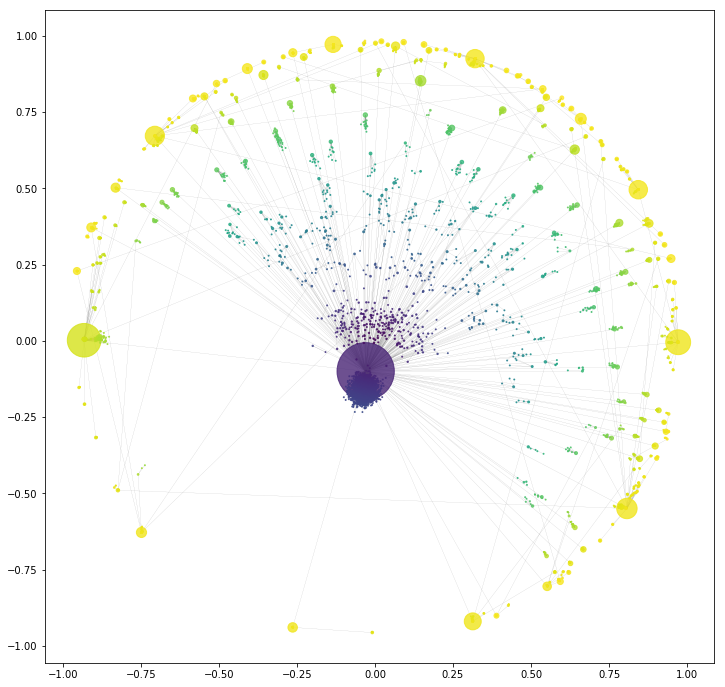

In [13]:
fig = plt.figure(figsize=(12, 12),facecolor='white')
ax = fig.add_subplot(111)
plt.scatter(node_x,node_y,s=ks,c=cs,alpha=0.8,zorder=2)
# cbar=plt.colorbar(shrink=1, pad=0.05, aspect=20)
# cbar.set_ticks([0,.5,1])
# cbar.set_ticklabels(list(map(str,[mn,md,mx])))
ax.add_collection(ln_coll)
plt.show()

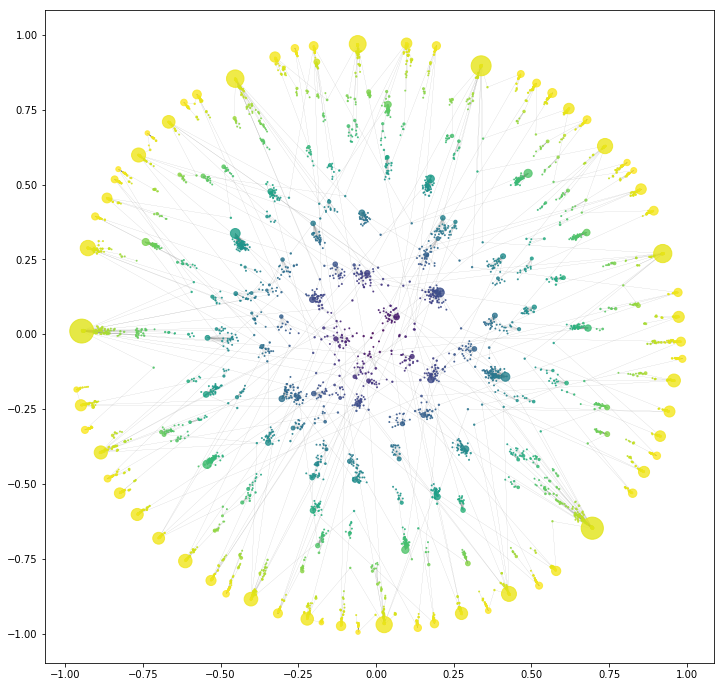

In [57]:
fig = plt.figure(figsize=(12, 12),facecolor='white')
ax = fig.add_subplot(111)
plt.scatter(node_x,node_y,s=ks,c=cs,alpha=0.8,zorder=2)
# cbar=plt.colorbar(shrink=1, pad=0.05, aspect=20)
# cbar.set_ticks([0,.5,1])
# cbar.set_ticklabels(list(map(str,[mn,md,mx])))
ax.add_collection(ln_coll)
plt.show()

In [39]:
md = np.median(df['w'].tolist())
df['weight']= [int(i/md) for i in df['w']]

In [40]:
df.head()

,s1,s2,w,weight
0,customer service,sales,13696300,1521811
1,management,sales,12319583,1368842
2,communication skills,management,11803370,1311485
3,management,customer service,11489953,1276661
4,leadership,management,10558244,1173138


In [3]:
# import os,logging
# logging.basicConfig(level=logging.INFO)
# model = PoincareModel(edges, negative=10, size=2)

# import time
# start=time.time()
# model.train(epochs=2000)
# print(time.time()-start)

# model.save('burning_glass.poincare')

In [7]:
# node_labels = model.kv.index2word
# node_x,node_y=(model.kv.vectors).T
# node_pos=dict(zip(node_labels,model.kv.vectors))
# displayedEdges=edges

# end